In [2]:
import yfinance as yf
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def fetch_stock_data(ticker, period='5y'):
    """
    Fetch historical stock data using yfinance
    
    Args:
        ticker (str): Stock ticker symbol
        period (str): Data retrieval period
    
    Returns:
        pandas.DataFrame: Historical stock data
    """
    stock = yf.Ticker(ticker)
    return stock.history(period=period)

def calculate_statistical_metrics(data):
    """
    Calculate statistical metrics for stock data
    
    Args:
        data (pandas.DataFrame): Stock historical data
    
    Returns:
        dict: Statistical metrics
    """
    # Calculate daily returns
    daily_returns = data['Close'].pct_change().dropna()
    daily_volume = data['Volume']
    daily_close = data['Close']

    # T-Score and Z-Score calculations
    t_score_returns = stats.ttest_1samp(daily_returns, 0)
    z_score_returns = stats.zscore(daily_returns)
    
    # Confidence Interval (95%)
    ci_returns = stats.t.interval(
        confidence=0.95, 
        df=len(daily_returns)-1, 
        loc=np.mean(daily_returns), 
        scale=stats.sem(daily_returns)
    )

    return {
        'daily_returns': daily_returns,
        'daily_volume': daily_volume,
        'daily_close': daily_close,
        't_score': {
            'statistic': t_score_returns.statistic,
            'p_value': t_score_returns.pvalue
        },
        'z_score': {
            'mean': np.mean(z_score_returns),
            'std': np.std(z_score_returns)
        },
        'confidence_interval': {
            'lower': ci_returns[0],
            'upper': ci_returns[1]
        }
    }

def plot_probability_distributions(metrics):
    """
    Plot probability distributions for daily metrics
    
    Args:
        metrics (dict): Statistical metrics
    """
    # Create a figure with subplots
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    fig.suptitle(f'Probability Distributions of Stock Metrics')

    # Daily Returns Distribution
    sns.histplot(metrics['daily_returns'], 
                 kde=True, 
                 ax=axs[0], 
                 color='blue')
    axs[0].set_title(f'Daily Returns Distribution of {ticker}')
    axs[0].set_xlabel('Daily Returns')
    axs[0].set_ylabel('Frequency')

    # Daily Volume Distribution
    sns.histplot(metrics['daily_volume'], 
                 kde=True, 
                 ax=axs[1], 
                 color='green')
    axs[1].set_title(f'Daily Volume Distribution of {ticker}')
    axs[1].set_xlabel('Daily Volume')
    axs[1].set_ylabel('Frequency')

    # Daily Close Price Distribution
    sns.histplot(metrics['daily_close'], 
                 kde=True, 
                 ax=axs[2], 
                 color='red')
    axs[2].set_title(f'Daily Close Price Distribution of {ticker}')
    axs[2].set_xlabel('Close Price')
    axs[2].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [17]:
def get_data(ticker):
    # Get stock ticker from user
    try:
        # Fetch stock data
        stock_data = fetch_stock_data(ticker)
        
        # Calculate statistical metrics
        metrics = calculate_statistical_metrics(stock_data)
        
        # Print statistical results
        print(f"\nStatistical Analysis for {ticker}:")
        print("\nT-Score:")
        print(f"Statistic: {metrics['t_score']['statistic']}")
        print(f"P-Value: {metrics['t_score']['p_value']}")
        
        print("\nZ-Score:")
        print(f"Mean: {metrics['z_score']['mean']}")
        print(f"Standard Deviation: {metrics['z_score']['std']}")
        
        print("\n95% Confidence Interval for Daily Returns:")
        print(f"Lower Bound: {metrics['confidence_interval']['lower']}")
        print(f"Upper Bound: {metrics['confidence_interval']['upper']}")
        
        # Plot probability distributions
        plot_probability_distributions(metrics)
    
    except Exception as e:
        print(f"Error analyzing stock data: {e}")


Statistical Analysis for TSLA:

T-Score:
Statistic: 2.6479481531367886
P-Value: 0.008199616809458188

Z-Score:
Mean: -1.9784403939223156e-17
Standard Deviation: 0.9999999999999999

95% Confidence Interval for Daily Returns:
Lower Bound: 0.0008154508894198027
Upper Bound: 0.005478942736122349


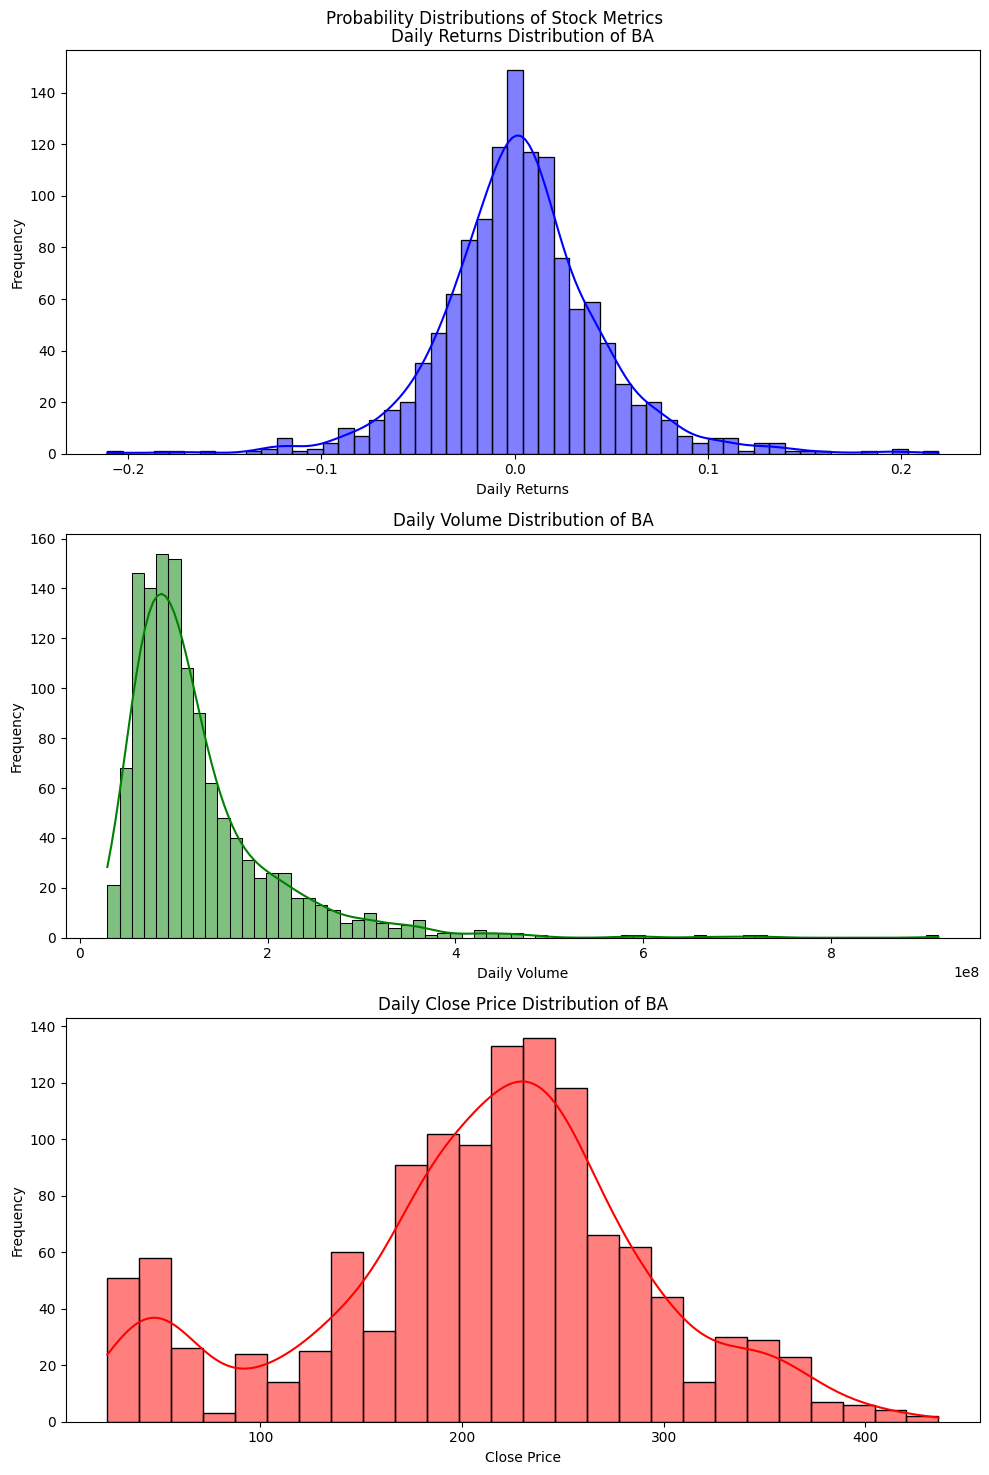

In [19]:
get_data("TSLA")


Statistical Analysis for BA:

T-Score:
Statistic: 0.001448496983102011
P-Value: 0.9988444970447584

Z-Score:
Mean: -1.4131717099445112e-17
Standard Deviation: 1.0

95% Confidence Interval for Daily Returns:
Lower Bound: -0.0017795665050767684
Upper Bound: 0.0017821962630714797


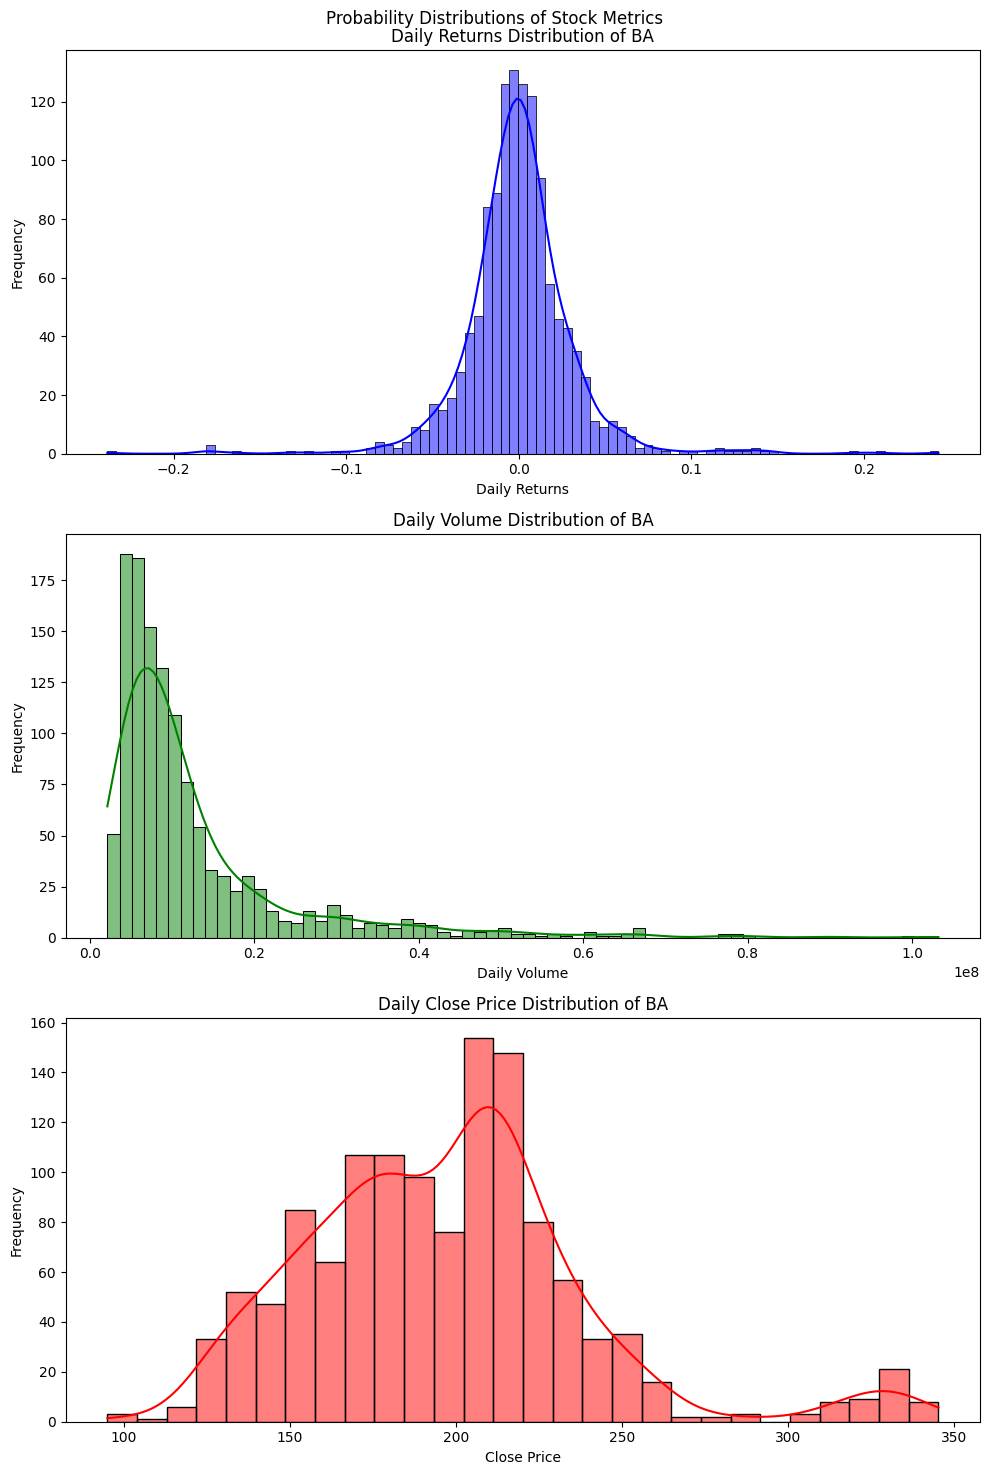

In [18]:
get_data("BA")